# Importing required LIBRARIES

In [1]:
#importing required libraries

import numpy as np                                         
import pandas as pd                                        
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers


2024-04-20 03:59:25.876861: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 03:59:25.877434: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 03:59:25.881261: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 03:59:25.923746: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 03:59:26.971777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

# Data Collection

I have collected the following datasets from Google Datasets and Kaggle:

1. Diabetes Dataset:
   - File Name: diabetes2.csv
   - Description: This dataset contains information related to diabetes, such as blood glucose levels, insulin levels, BMI, age, and other relevant health metrics.

2. Heart Dataset:
   - File Name: heart_2020_cleaned.csv
   - Description: This dataset contains information related to heart health or cardiovascular diseases, including features such as blood pressure, cholesterol levels, age, gender, lifestyle factors, and possibly medical history.

3. Merged Health Dataset:
   - File Name: health_data_modified.csv
   - Description: This dataset is a merged or modified version of health-related data, possibly combining data from multiple sources or including additional engineered features for specific analyses or modeling tasks.

To access these datasets, I used the pandas library in Python to read the CSV files into DataFrames:


In [2]:
#importing csv files into pandas dataframes

diab = pd.read_csv("diabetes2.csv")
heart = pd.read_csv("heart_2020_cleaned.csv")
merge = pd.read_csv("health_data_modified.csv")

# Data Exploration and Analysis

In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diab.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [7]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [9]:
heart.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [10]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [11]:
heart.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [12]:
heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Feature Engineering
## Dimensions Required:
    

Age,
BMI (Body Mass Index),
BP,
Sleep Time,
Gender

In [13]:
diab.drop(columns = ['Pregnancies','Glucose','SkinThickness','Insulin','Outcome','DiabetesPedigreeFunction','Age'], inplace = True)

In [14]:
diab.columns

Index(['BloodPressure', 'BMI'], dtype='object')

In [15]:
heart.drop(columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke', 'PhysicalHealth','MentalHealth', 'DiffWalking','Race','Diabetic','PhysicalActivity','GenHealth', 'Asthma', 'KidneyDisease' ,'SkinCancer'], inplace = True)

In [16]:
heart.columns

Index(['BMI', 'Sex', 'AgeCategory', 'SleepTime'], dtype='object')

In [17]:
merge = pd.merge(diab, heart, on='BMI', how='inner')

In [18]:
merge.count()

BloodPressure    95671
BMI              95671
Sex              95671
AgeCategory      95671
SleepTime        95671
dtype: int64

# Feature Selection

In [19]:
merge.head()

,BloodPressure,BMI,Sex,AgeCategory,SleepTime
0,72,33.6,Male,75-79,9.0
1,72,33.6,Male,65-69,7.0
2,72,33.6,Male,50-54,7.0
3,72,33.6,Male,60-64,6.0
4,72,33.6,Male,75-79,8.0


In [20]:
merge.tail()

,BloodPressure,BMI,Sex,AgeCategory,SleepTime
95666,62,41.2,Female,50-54,6.0
95667,62,41.2,Female,35-39,5.0
95668,62,41.2,Male,30-34,7.0
95669,62,41.2,Female,30-34,7.0
95670,74,46.3,Male,55-59,7.0


In [21]:
sex_map = {'Female': 0, 'Male': 1}

merge['Sex'] = merge['Sex'].map(sex_map)


Changing AgeCategory from interval to numeric value

In [22]:
def average_of_range(range_str):
    if range_str == '80 or older':
        return 80
    else:
        start, end = map(int, range_str.split('-'))
        return (start + end) / 2

merge['Age_'] = merge['AgeCategory'].apply(average_of_range)

merge['Age_'] = merge['Age_'].astype(int)

merge.drop(columns=['AgeCategory'], inplace=True)

In [23]:
merge.head()

,BloodPressure,BMI,Sex,SleepTime,Age_
0,72,33.6,1,9.0,77
1,72,33.6,1,7.0,67
2,72,33.6,1,7.0,52
3,72,33.6,1,6.0,62
4,72,33.6,1,8.0,77


In [24]:
merge.rename(columns={'Sex': 'Gender'}, inplace=True)

In [25]:
merge.count()

BloodPressure    95671
BMI              95671
Gender           95671
SleepTime        95671
Age_             95671
dtype: int64

In [26]:
merge.columns

Index(['BloodPressure', 'BMI', 'Gender', 'SleepTime', 'Age_'], dtype='object')

In [27]:
merge.describe()

,BloodPressure,BMI,Gender,SleepTime,Age_
count,95671.000000,95671.000000,95671.000000,95671.000000,95671.000000
mean,66.934191,28.475101,0.576643,7.088742,54.603464
std,16.404427,4.194303,0.494094,1.409604,17.306207
min,0.000000,18.400000,0.000000,1.000000,21.000000
25%,60.000000,25.100000,0.000000,6.000000,42.000000
50%,68.000000,28.700000,1.000000,7.000000,57.000000
75%,76.000000,30.900000,1.000000,8.000000,67.000000
max,122.000000,59.400000,1.000000,24.000000,80.000000


In [28]:
merge.tail()

,BloodPressure,BMI,Gender,SleepTime,Age_
95666,62,41.2,0,6.0,52
95667,62,41.2,0,5.0,37
95668,62,41.2,1,7.0,32
95669,62,41.2,0,7.0,32
95670,74,46.3,1,7.0,57


### Export the DataFrame to a CSV file
csv_filename = 'merge_output.csv'   Provide the desired filename \n
merge.to_csv(csv_filename, index=False)   Setting index=False to avoid writing row numbers as a column

### It is saved for backup


Calculated dummy column using online information for a better prediction

In [29]:
import pandas as pd
import numpy as np

# Define the function to calculate health score
def calculate_health_score(blood_pressure, bmi, gender, sleep_time, age):
    score = 0
 
    heartbeat, bmi, gender, sleeptime, age = blood_pressure, bmi, gender, sleep_time, age
        
    if 60 <= heartbeat < 120:
        score += 2
    elif (45 <= heartbeat < 60) or (100 <= heartbeat < 180):
        score += 1
    else:
        score += 0
            
    if 18 <= bmi< 25:
        score += 2
    elif (9 <= bmi < 18) or (25 <= bmi < 48):
        score += 1
    else:
        score += 0
        
    if gender == 1:
        score += 2
    else:
        score += 1
            
    if 5 <= sleeptime < 10:
        score += 2
    elif (3 <= sleeptime < 5) or (10 <= sleeptime < 13):
        score += 1
    else:
        score += 0
            
    if 18 <= age < 40:
        score += 2
    elif (4 <= age < 18) or (40 <= age < 60):
        score += 1
    else:
        score += 0
            
    return score


In [30]:
blood_pressure = 72
bmi = 22
gender = 0  
sleep_time = 8
age = 40

health_score = calculate_health_score(age,bmi,blood_pressure, sleep_time, gender)
print("Health Score:", health_score)


Health Score: 5


In [31]:
health_scores = []

for index, row in merge.iterrows():
    age = row['Age_']
    bmi = row['BMI']
    blood_pressure = row['BloodPressure']
    sleep_time = row['SleepTime']
    gender = row['Gender']
    
    health_score = calculate_health_score(age, bmi, blood_pressure, sleep_time, gender)
    
    health_scores.append(health_score)

merge['health_score'] = health_scores

merge.head()

,BloodPressure,BMI,Gender,SleepTime,Age_,health_score
0,72,33.6,1,9.0,77,6
1,72,33.6,1,7.0,67,6
2,72,33.6,1,7.0,52,5
3,72,33.6,1,6.0,62,6
4,72,33.6,1,8.0,77,6


# Visualizing Engineered Data

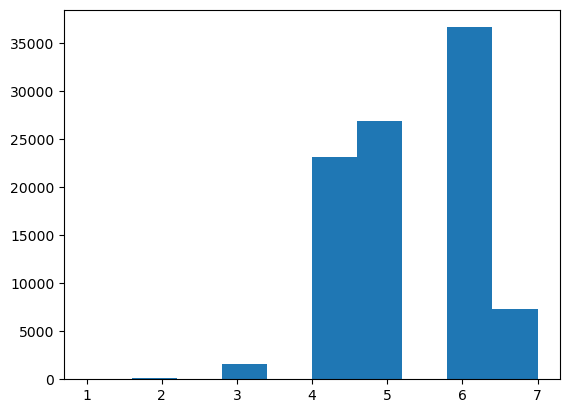

In [32]:
plt.hist(merge['health_score'])
plt.show()

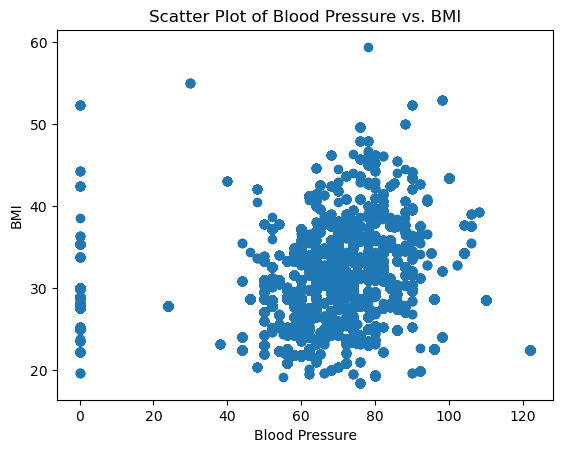

In [33]:
plt.scatter(merge['BloodPressure'], merge['BMI'])
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.title('Scatter Plot of Blood Pressure vs. BMI')
plt.show()

In [34]:
avg_blood_pressure = merge[merge['BloodPressure'] != 0]['BloodPressure'].mean()

merge['BloodPressure'] = merge['BloodPressure'].replace(0, avg_blood_pressure)


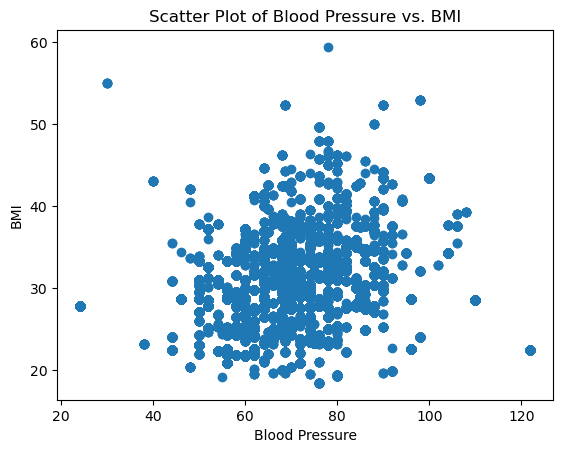

In [35]:
plt.scatter(merge['BloodPressure'], merge['BMI'])
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
plt.title('Scatter Plot of Blood Pressure vs. BMI')
plt.show()

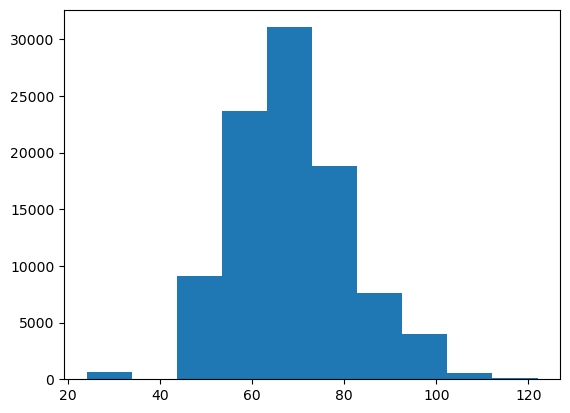

In [36]:
plt.hist(merge['BloodPressure'])
plt.show()

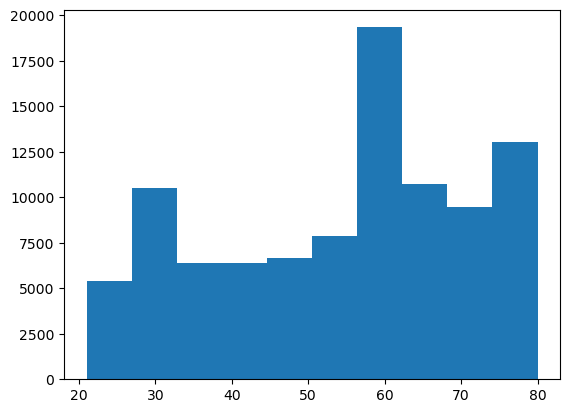

In [37]:
plt.hist(merge['Age_'])
plt.show()

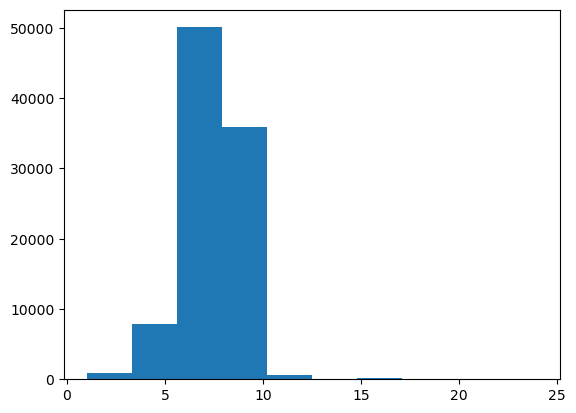

In [38]:
plt.hist(merge['SleepTime'])
plt.show()

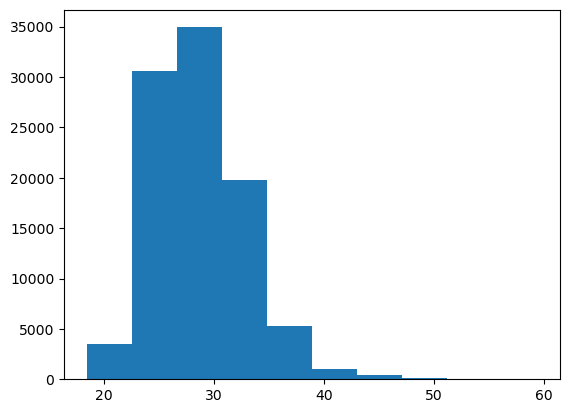

In [39]:
plt.hist(merge['BMI'])
plt.show()

<Axes: xlabel='health_score', ylabel='BloodPressure'>

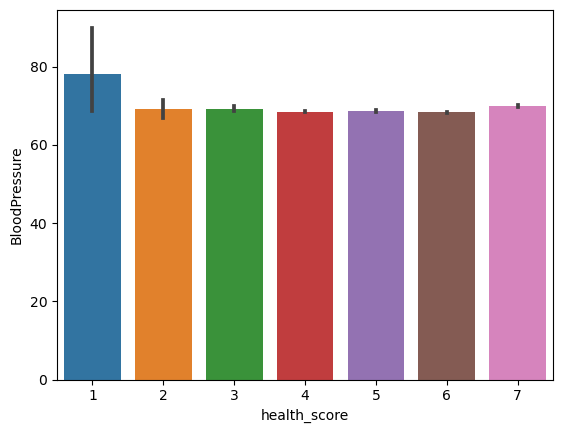

In [40]:
sns.barplot(x='health_score', y='BloodPressure', data=merge)


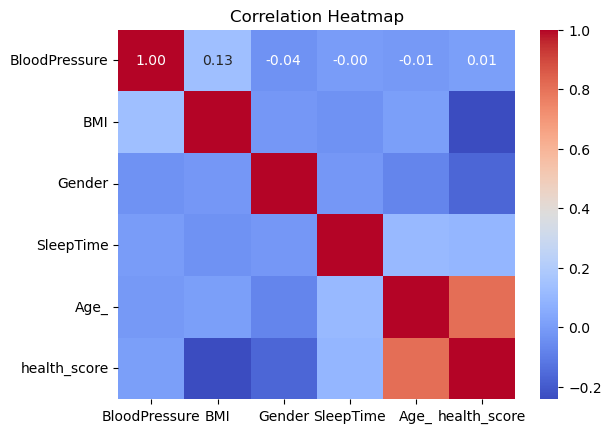

In [41]:
correlation_matrix = merge.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Correlation Heatmap')

plt.show()

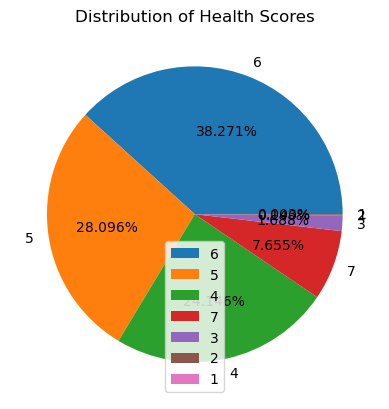

In [42]:
healthscore_counts = merge['health_score'].value_counts()

labels = healthscore_counts.index.tolist()

plt.pie(healthscore_counts, labels=labels, autopct='%1.3f%%')
plt.legend()


plt.title('Distribution of Health Scores')

plt.show()

<Axes: xlabel='Age_', ylabel='count'>

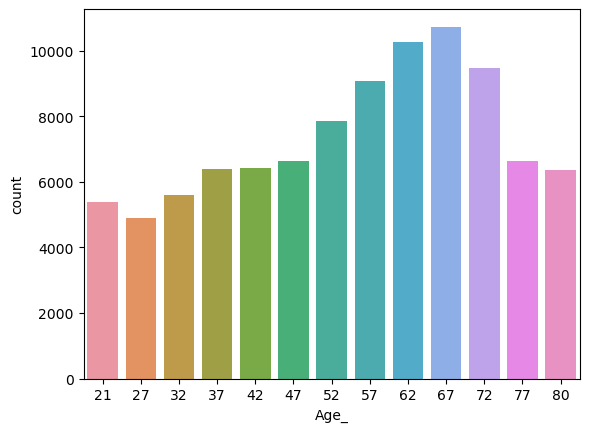

In [43]:
sns.countplot(x='Age_',data = merge)

# Data Splitting

In [44]:
X = merge[['BloodPressure', 'BMI', 'Gender', 'SleepTime', 'Age_']]
y = merge['health_score']

In [45]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Data Transformation

In [46]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


 # Training the model (Model Building, compiling and Fitting)

In [47]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='sigmoid')  # Output layer with 6 units for 6 health score categories
])

/home/niranjan/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [48]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [49]:
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))


Epoch 1/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 3s 783us/step - accuracy: 0.7193 - loss: 0.8556 - val_accuracy: 0.8974 - val_loss: 0.3071
Epoch 2/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 737us/step - accuracy: 0.9007 - loss: 0.2808 - val_accuracy: 0.9233 - val_loss: 0.2239
Epoch 3/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.9271 - loss: 0.2077 - val_accuracy: 0.9433 - val_loss: 0.1724
Epoch 4/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step - accuracy: 0.9431 - loss: 0.1640 - val_accuracy: 0.9553 - val_loss: 0.1426
Epoch 5/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - accuracy: 0.9527 - loss: 0.1403 - val_accuracy: 0.9595 - val_loss: 0.1230
Epoch 6/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 755us/step - accuracy: 0.9582 - loss: 0.1218 - val_accuracy: 0.9638 - val_loss: 0.1113
Epoch 7/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 784us/step - accuracy: 0.9626 - loss: 0.1091 - val_accuracy: 0.9687 - val_loss: 0.0989
Epoch 8/20
2392/2392 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - accuracy: 0.9653 -

# Model Evaluation

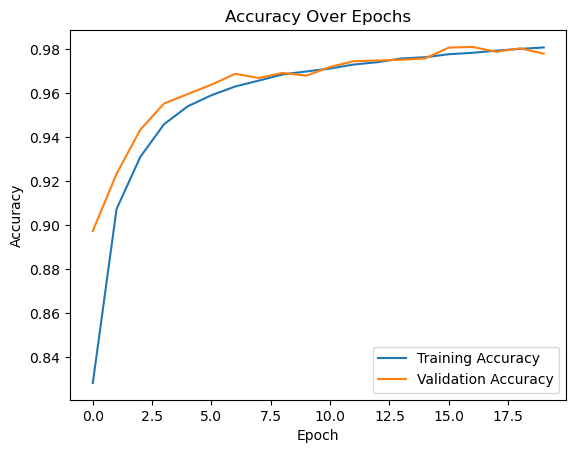

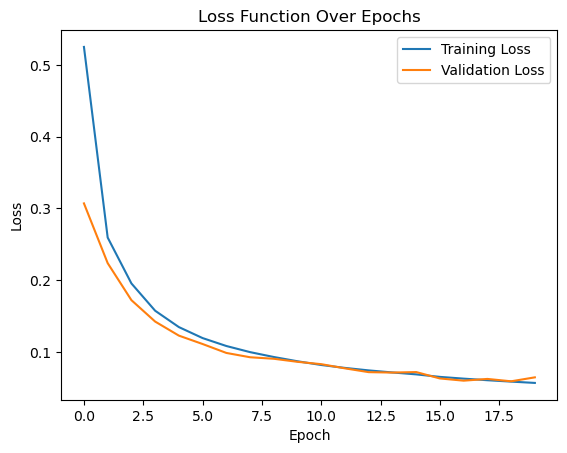

In [50]:
# Plot accuracy over epochs


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot loss function over epochs


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function Over Epochs')
plt.show()


In [51]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)


299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9794 - loss: 0.0536
Test Accuracy: 0.9807692170143127


# Model Testing

In [52]:
# BloodPressure BMI Gender SleepTime Age_
input_data = np.array([[84,55,1,1,84]])  
input_data_scaled = scaler.transform(input_data) 
predicted_health_score = model.predict(input_data_scaled)

predicted_category = np.argmax(predicted_health_score) + 1 

print("Predicted Health Score Category:", predicted_category)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Health Score Category: 4


/home/niranjan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Deploying model

In [53]:
from tensorflow.keras.models import save_model

# Assuming 'model' is your Keras model object
save_model(model, 'latest_ML_99_per.h5', save_format='h5')
